In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
def fun(x, y) :
    return (x **2) - (y ** 2)

In [5]:
#preparing data
x = np.random.randn(10000)
y = np.random.randn(10000)
X = np.stack([x, y], axis = 1)

T = fun(x, y)
print(f'X shape = {X.shape}\nT shape = {T.shape}')

X shape = (10000, 2)
T shape = (10000,)


In [6]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)
print(f'X_train shape = {X_train.shape}\nX_test shape = {X_test.shape}')

X_train shape = (8000, 2)
X_test shape = (2000, 2)


In [7]:
#preparing the model
def prepare_model() :
    i = Input(shape=(X_train.shape[1],))
    x = Dense(1, activation = 'relu') (i)
    x = Dense(1, activation = 'sigmoid') (x)

    return Model(i, x)

In [8]:
model = prepare_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
def train() :
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',)
    hist = model.fit(x=X_train, 
              y=T_train, 
              batch_size=32, 
              epochs=100, 
              #callbacks=[early_stopping_callback], 
              validation_data=(X_test, T_test)
             )
    return hist

In [10]:
model.compile(optimizer='SGD', loss='mean_squared_error')

In [11]:
hist_sgd = train()

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7832 - val_loss: 4.1411
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 3.6535 - val_loss: 4.0486
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 3.5668 - val_loss: 3.9683
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 3.4902 - val_loss: 3.9042
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 3.4340 - val_loss: 3.8589
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 3.3950 - val_loss: 3.8262
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 3.3670 - val_loss: 3.8029
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 3.3465 - val_loss: 3.7849
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 3.3310 - val_loss: 3.7712
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 3.3188 - val_lo

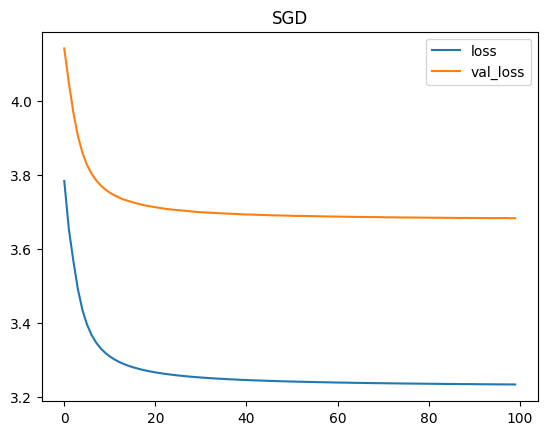

In [12]:
plt.figure()
plt.title('SGD')
plt.plot(hist_sgd.history['loss'], label = 'loss')
plt.plot(hist_sgd.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

sgd_loss = hist_sgd.history['loss']

In [13]:
model = prepare_model( )
model.compile(optimizer='Adam', loss='mean_squared_error')

In [14]:
hist_adam = train()

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7684 - val_loss: 4.1367
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 3.6890 - val_loss: 4.0821
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 3.6490 - val_loss: 4.0469
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 3.6162 - val_loss: 4.0144
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 3.5919 - val_loss: 3.9926
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 3.5777 - val_loss: 3.9810
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 3.5685 - val_loss: 3.9722
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 3.5621 - val_loss: 3.9675
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 3.5580 - val_loss: 3.9639
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 3.5553 - val_lo

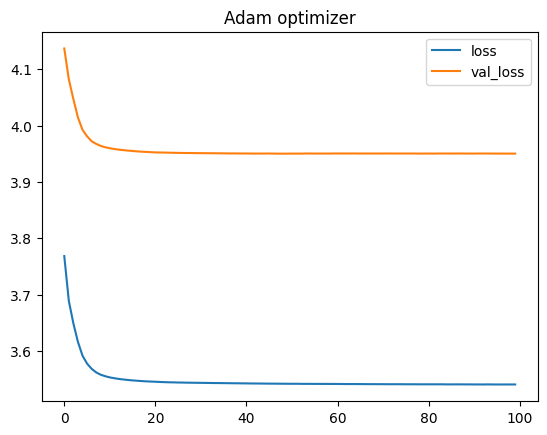

In [15]:
plt.figure()
plt.title('Adam optimizer')
plt.plot(hist_adam.history['loss'], label = 'loss')
plt.plot(hist_adam.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

adam_loss = hist_adam.history['loss']

In [16]:
model = prepare_model()
model.compile(optimizer='Adadelta', loss='mean_squared_error')

In [17]:
hist_adadelta = train()

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7595 - val_loss: 4.2012
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7593 - val_loss: 4.2010
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7591 - val_loss: 4.2009
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7589 - val_loss: 4.2007
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7587 - val_loss: 4.2005
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7586 - val_loss: 4.2003
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7584 - val_loss: 4.2001
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7582 - val_loss: 4.1999
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7580 - val_loss: 4.1998
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 3.7578 - val_lo

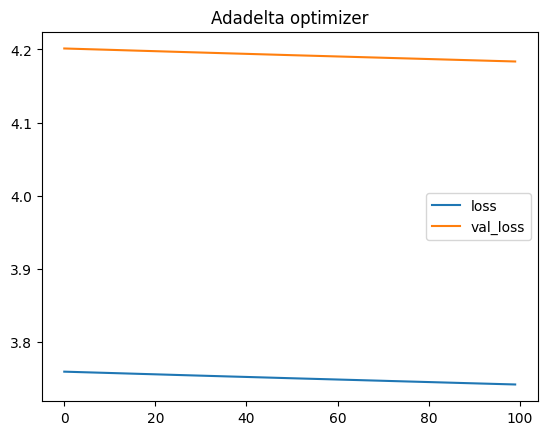

In [18]:
plt.figure()
plt.title('Adadelta optimizer')
plt.plot(hist_adadelta.history['loss'], label = 'loss')
plt.plot(hist_adadelta.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

adadelta_loss = hist_adadelta.history['loss']

In [19]:
model = prepare_model()
model.compile(optimizer='Adagrad', loss='mean_squared_error')

In [20]:
hist_adagrad = train()

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 3.9990 - val_loss: 4.4383
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9894 - val_loss: 4.4308
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9830 - val_loss: 4.4251
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9779 - val_loss: 4.4203
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9734 - val_loss: 4.4160
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9695 - val_loss: 4.4121
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9658 - val_loss: 4.4085
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9625 - val_loss: 4.4052
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9593 - val_loss: 4.4021
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 3.9564 - val_lo

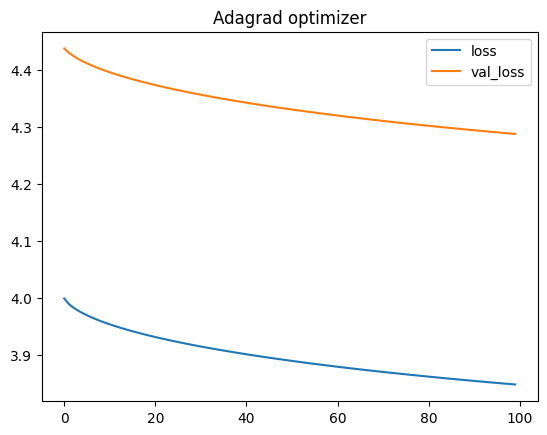

In [21]:
plt.figure()
plt.title('Adagrad optimizer')
plt.plot(hist_adagrad.history['loss'], label = 'loss')
plt.plot(hist_adagrad.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

adagrad_loss = hist_adagrad.history['loss']

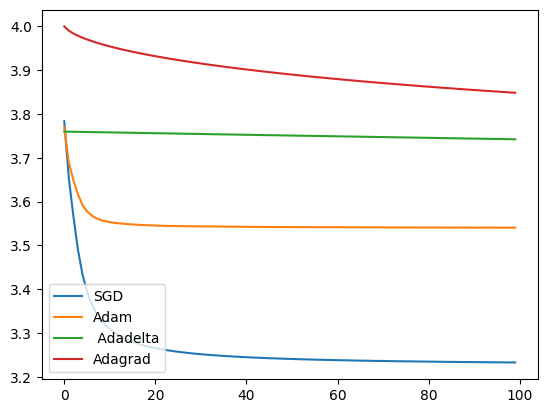

In [22]:
plt.figure()
plt.plot(sgd_loss, label = 'SGD')
plt.plot(adam_loss, label = 'Adam')
plt.plot(adadelta_loss, label = ' Adadelta')
plt.plot(adagrad_loss, label = 'Adagrad')
plt.legend()
plt.show()